           x        sin(x)
0   0.000000  0.000000e+00
1   0.330694  3.246995e-01
2   0.661388  6.142127e-01
3   0.992082  8.371665e-01
4   1.322776  9.694003e-01
5   1.653470  9.965845e-01
6   1.984164  9.157733e-01
7   2.314858  7.357239e-01
8   2.645552  4.759474e-01
9   2.976246  1.645946e-01
10  3.306940 -1.645946e-01
11  3.637634 -4.759474e-01
12  3.968328 -7.357239e-01
13  4.299022 -9.157733e-01
14  4.629715 -9.965845e-01
15  4.960409 -9.694003e-01
16  5.291103 -8.371665e-01
17  5.621797 -6.142127e-01
18  5.952491 -3.246995e-01
19  6.283185 -2.449294e-16


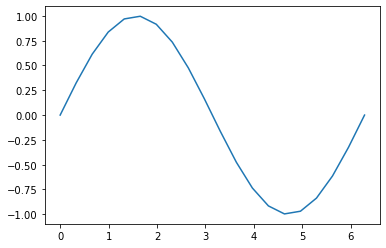

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#ちょっと寄り道。
#pandasのDataFrameの使用。そのデータをMatplotlibでグラフ作成。
fig, ax = plt.subplots()
x = np.linspace(start=0, stop=2*np.pi, num=20)
y = np.array([np.sin(i) for i in x])
sin_wave = np.array([x,y])

pd_data = pd.DataFrame(sin_wave, index=["x","sin(x)"]).transpose()
print(pd_data)
ax.plot(pd_data["x"], pd_data["sin(x)"])

(array([1.000e+00, 4.000e+00, 5.000e+00, 2.700e+01, 5.600e+01, 1.300e+02,
        3.490e+02, 0.000e+00, 6.380e+02, 1.140e+03, 1.815e+03, 2.603e+03,
        3.333e+03, 3.834e+03, 4.193e+03, 4.278e+03, 4.059e+03, 3.815e+03,
        3.434e+03, 3.510e+03, 3.592e+03, 4.197e+03, 4.948e+03, 5.510e+03,
        5.765e+03, 5.506e+03, 4.907e+03, 3.932e+03, 0.000e+00, 2.911e+03,
        1.832e+03, 1.055e+03, 5.490e+02, 2.460e+02, 8.200e+01, 3.300e+01,
        9.000e+00, 3.000e+00]),
 array([607., 608., 609., 610., 611., 612., 613., 614., 615., 616., 617.,
        618., 619., 620., 621., 622., 623., 624., 625., 626., 627., 628.,
        629., 630., 631., 632., 633., 634., 635., 636., 637., 638., 639.,
        640., 641., 642., 643., 644., 645.]),
 <BarContainer object of 38 artists>)

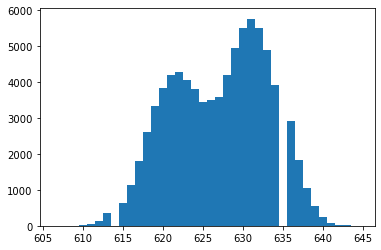

In [2]:
#測定値をグラフで表示。グラフは、マルチモーダル（多峰性）な分布


fig, ax = plt.subplots()
data = pd.read_csv("./sensor_data_600.txt", delimiter=" ", header = None, names = ("date", "time", "ir", "lidar"))
ax.hist(data["lidar"], bins = max(data["lidar"]) - min(data["lidar"]),align="left")

In [3]:
data

,date,time,ir,lidar
0,20180202,110001,28,627
1,20180202,110004,17,626
2,20180202,110007,14,627
3,20180202,110010,31,622
4,20180202,110013,24,630
...,...,...,...,...
82296,20180205,84216,39,634
82297,20180205,84220,13,637
82298,20180205,84222,37,633
82299,20180205,84225,36,633


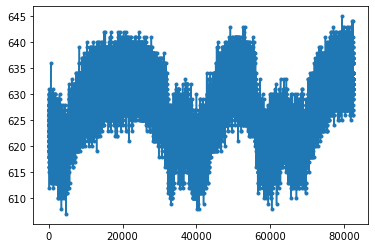

In [4]:
#Lidar値を、測定した順番に並べて表示
fig, ax = plt.subplots()
ax.plot(data["lidar"], marker=".", ls="-")

<class 'pandas.core.frame.DataFrame'>


Text(0, 0.5, 'Lidar value (mm)')

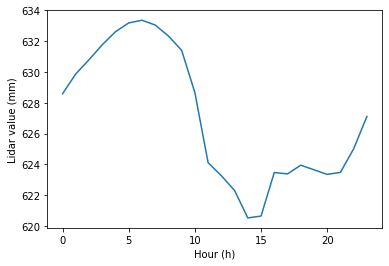

In [5]:
data["hour"] = [e//10000 for e in data.time] #timeのうち、分秒を切り捨て。
d = data.groupby("hour")                     #各時刻のデータをグルーピング。dには全てのデータが入っている。

#PandasのseriesからDataFrameへ変換
new_d = pd.DataFrame(d.lidar.mean())         #lidar値を平均し、indexのhourが横軸でプロット。
print(type(new_d))

#Matplotlibで、オブジェクト指向インターフェースの記述方法
fig, ax = plt.subplots()
ax.plot(new_d.index, new_d["lidar"],  label = 'lidar')
ax.set_xlabel('Hour (h)')
ax.set_ylabel('Lidar value (mm)')

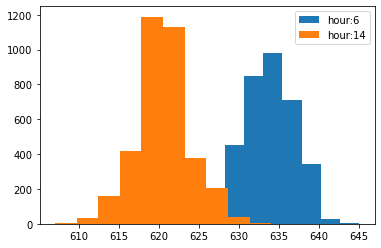

In [6]:
#6時と14時に測定したlidarのデータの分布を目視で比較。
fig, ax = plt.subplots()
ax.hist(d["lidar"].get_group(6), label = 'hour:6')
ax.hist(d["lidar"].get_group(14), label = 'hour:14')
ax.legend()


<BarContainer object of 37 artists>

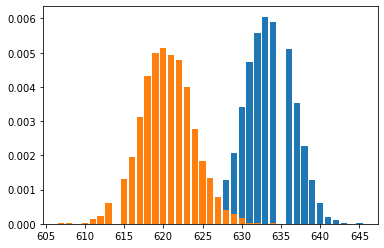

In [28]:
#測定した全データから、1時間おきのデータに分離して、6時と14時のデータのヒストグラムを作成。
fig = plt.figure()
ax0 = fig.add_subplot(1,1,1)
each_hour = { i : d.lidar.get_group(i).value_counts().sort_index()  for i in range(24)}
freqs = pd.concat(each_hour, axis=1)
freqs = freqs.fillna(0)
probs = freqs/len(data)
ax0.bar(x=probs.index,height=probs[6])
ax0.bar(x=probs.index,height=probs[14])

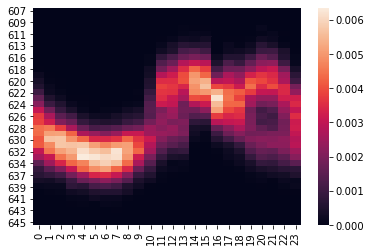

In [29]:
import seaborn as sns

sns.heatmap(probs)
plt.show()

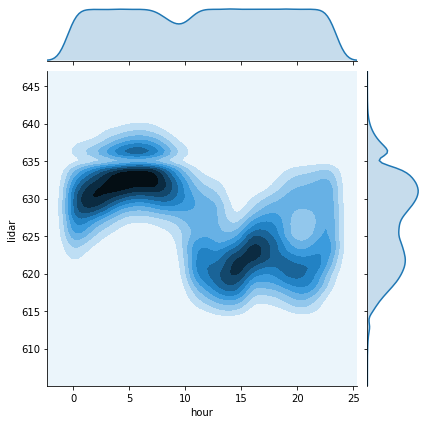

In [31]:
#同時確率分布（結合分布とも呼ぶ）
sns.jointplot(data["hour"], data["lidar"], data, kind="kde")
plt.show()

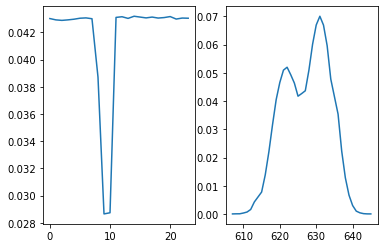

In [32]:
#加法定理
#左の図はlidarの値を消して時間の確率密度分布へ、右の図はhourを消してlidarの値を確立密度分布へ。この操作を周辺化と呼ぶ。
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
p_t = pd.DataFrame(probs.sum()) #tの確率分布
p_z = pd.DataFrame(probs.transpose().sum()) #zの確率分布
ax1.plot(p_t)
ax2.plot(p_z)

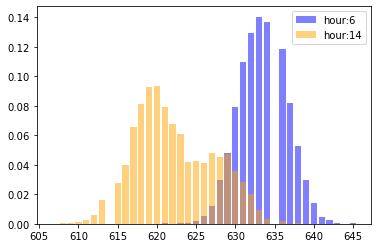

In [112]:
#乗法定理
#同時確率分布p(z,t) = 条件付き確率分布p(z|t) * tの確率分布p(t)

#ある時刻の条件を付けた場合の確率分布を乗法定理の計算で求める。
#測定により、同時確率分布と、時間の確率分布は既知なので、計算できる。

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

cond_z_t = probs.div(p_t[0],axis=1) #次元数が異なるPandasデータの割り算。
#print(cond_z_t)
ax.bar(x=cond_z_t.index, height=cond_z_t[6], color="blue", alpha=0.5, label = 'hour:6')
ax.bar(x=cond_z_t.index, height=cond_z_t[13], color="orange", alpha=0.5, label = 'hour:14') 
plt.legend()

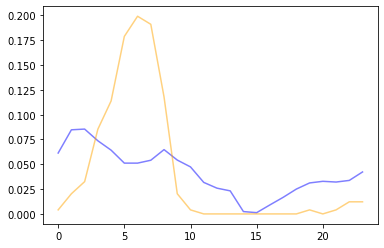

In [111]:
#乗法定理
#次は、各lidarの測定値を条件とした時の、時刻の確率分布を求める。

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cond_t_z = probs.transpose().div(p_z[0],axis=1) #次元数が異なるPandasデータの割り算。
ax.plot(cond_t_z.index, cond_t_z[630], color="blue", alpha=0.5, label = 'lidar:602')
ax.plot(cond_t_z.index, cond_t_z[640], color="orange", alpha=0.5, label = 'lidar:602')
#plt.legend()

In [87]:
#乗法定理とベイズの定理、両方でP(z=630|t=13)を求める。

#乗法定理
print(cond_z_t[13][630])

#ベイズの定理P(z=630|t=13) = P(t=13|z=630)*P(z=630)/P(t=13)
bayes_z_t = cond_t_z[630][13]*p_z[0][630]/p_t[0][13]
print(bayes_z_t)

0.036147980796385204
0.036147980796385204


1.0000000000000002


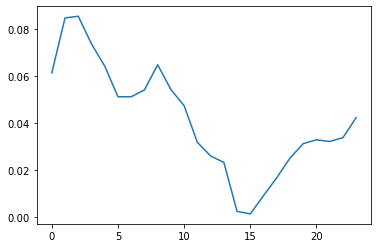

In [107]:
#ベイズの定理により、結果から原因を推定する。求めたいのは、測定したデータzは、どの時刻で得られたものかという確率分布P(t|z)
#P(t|z) = P(z|t)*P(t)/P(z)
def bayes_estimation(sensor_value, current_estimation):
    new_estimation = []
    for i in range(24):
        new_estimation.append(cond_z_t[i][sensor_value]*current_estimation[i])
    return new_estimation/sum(new_estimation)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(bayes_estimation(630,p_t[0]))

print(sum(bayes_estimation(630,p_t[0])))

1.0000000000000002


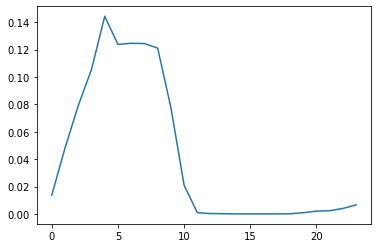

In [108]:
#ベイズの定理で、連続して測定されたデータ3つ（結果）が測定された時刻（原因）の確率分布を求める。 
values=[630,632,636]
estimation = p_t[0]

for i in values:
    estimation = bayes_estimation(i, estimation)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(estimation, label="factor")
print(sum(estimation))